# Epileptic Seizure Model for EEG Signals with full data

In [1]:
import pandas as pd
#import scipy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
missing_values = [0.0]
data = pd.read_csv(r'eeg_data.csv',na_values = missing_values)
print(data['FP1_power_delta'].dtype)
print(data.shape)
print(data.isnull().sum())
data=data.fillna(data.mean())
print(data['C3_LSWT_D3'].isnull().sum())

float64
(2216, 668)
FP1_power_delta    0
FP1_power_theta    0
FP1_power_alpha    0
FP1_power_beta     0
FP1_power_gamma    0
                  ..
T6_STD_D3          0
T6_STD_D4          0
T6_STD_D5          0
T6_STD_D6          0
epileptic_         0
Length: 668, dtype: int64
0


In [3]:
data

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
0,15.980332,8.633358,3.092433,0.846559,0.372832,17.581626,9.937238,3.485713,0.945396,0.428797,...,31.427918,29.699413,32.013546,3.583559,12.529528,45.831132,61.890813,34.783454,33.245906,1
1,223.267803,41.573241,13.043525,6.463381,6.168712,298.274432,50.013025,14.411482,6.659230,4.942250,...,24.822720,47.185918,93.619195,14.158489,15.217886,30.927407,77.324322,153.442359,213.780950,1
2,158.673907,31.788608,9.956198,3.736977,2.926979,232.762742,39.332981,10.956081,3.478036,2.153082,...,21.708222,47.412375,85.729645,9.493639,11.824569,24.555772,59.229187,112.406306,171.618208,1
3,29.767326,3.875543,1.553127,0.438266,0.140495,45.206547,5.173542,2.028637,0.528962,0.161283,...,26.319506,39.628894,51.473202,1.872515,5.392639,17.296780,35.824586,44.892899,79.613460,1
4,33.821075,3.635210,1.347280,0.313205,0.080396,55.670043,4.925017,1.783729,0.394463,0.102254,...,26.111048,39.177537,52.925676,1.408291,4.556997,12.733549,25.676801,44.406617,94.770581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,93.573012,9.060520,4.980545,4.839014,2.402408,103.479883,10.121498,5.411378,5.112091,2.410508,...,28.420439,35.838353,55.575530,13.980452,15.455901,17.599760,35.736742,44.639277,52.441626,-1
2212,15.523587,3.195279,1.268068,0.788076,0.350012,15.177286,3.420879,1.324339,0.772379,0.340149,...,25.567858,29.982968,19.842641,3.896454,4.507998,9.674004,29.642064,32.178907,23.513508,-1
2213,17.580684,2.208482,0.512273,0.122671,0.042173,18.294247,2.380609,0.560150,0.132999,0.045041,...,15.186601,23.281200,31.479138,1.183803,2.253192,6.133507,18.810084,29.451244,40.868567,-1
2214,35.847315,3.354388,2.280252,2.368355,1.217081,33.889844,3.048972,1.356364,1.159790,0.632721,...,20.376012,23.182715,24.117538,6.995231,6.819144,9.820588,26.620415,30.167641,31.778504,-1


In [4]:
data.shape

(2216, 668)

In [5]:
data['epileptic_'].value_counts()

-1    1196
 1    1020
Name: epileptic_, dtype: int64

In [6]:
data.describe()

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2784.618464,988.760235,746.234771,701.487094,1001.431795,2085.578266,992.570476,895.149975,668.364261,1031.370227,...,58.296417,88.001721,143.249343,34.949327,29.083232,46.686025,61.305950,91.994480,150.603345,-0.079422
std,27119.740834,12199.666703,12018.648373,10668.946272,14544.502539,20670.847816,12618.098105,14047.391047,10791.187751,14990.469349,...,203.322445,304.407625,468.151048,315.861267,171.065282,217.826912,207.851277,308.832664,489.946628,0.997066
min,0.025945,0.012101,0.009409,0.007828,0.008412,0.026174,0.018836,0.010871,0.006120,0.006863,...,0.950777,1.057651,1.118569,0.525890,0.846936,0.878841,0.909989,0.918962,1.115070,-1.000000
25%,25.524041,3.983245,1.868825,0.789355,0.381195,27.138890,4.254592,1.989122,0.845677,0.408081,...,12.298674,14.891381,23.835592,3.525874,5.796019,11.084702,14.190864,16.742939,26.750093,-1.000000
50%,68.865751,8.807711,3.874506,1.795211,0.972968,73.483311,9.688978,4.133793,1.863871,0.973485,...,18.643405,23.730646,39.095777,5.855205,8.580373,15.806232,20.932141,27.049199,44.603975,-1.000000
75%,271.174926,30.093458,12.052042,6.926863,3.777847,288.354575,29.503963,12.237335,7.139232,3.782326,...,32.798456,51.946562,84.372372,11.453332,14.326938,27.297323,36.869445,57.139089,101.925711,1.000000
max,859895.816200,350651.120900,403916.724100,291058.726500,285573.572400,604373.606700,346870.948100,407756.698100,291640.733100,287933.513100,...,3283.112473,5501.471732,11030.429640,5777.660876,3620.162008,4585.801410,3620.523797,5538.873638,10730.168760,1.000000


In [7]:
data.corr()

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
FP1_power_delta,1.000000,0.597389,0.419714,0.320018,0.285790,0.937439,0.583875,0.435526,0.359076,0.271115,...,0.708348,0.750890,0.771528,0.370518,0.535774,0.567108,0.704875,0.714669,0.743068,0.001203
FP1_power_theta,0.597389,1.000000,0.966870,0.854606,0.746975,0.612743,0.876825,0.902870,0.853503,0.717770,...,0.746224,0.694555,0.500477,0.734618,0.863155,0.870292,0.763765,0.691106,0.507375,0.030894
FP1_power_alpha,0.419714,0.966870,1.000000,0.891463,0.771047,0.450005,0.823014,0.903632,0.868846,0.737023,...,0.627140,0.551249,0.348365,0.731775,0.826396,0.815057,0.653646,0.559538,0.358227,0.041936
FP1_power_beta,0.320018,0.854606,0.891463,1.000000,0.871032,0.354445,0.767653,0.854345,0.878604,0.803583,...,0.591509,0.485392,0.276455,0.790828,0.820048,0.793785,0.618890,0.496563,0.284465,0.056143
FP1_power_gamma,0.285790,0.746975,0.771047,0.871032,1.000000,0.324560,0.748854,0.829906,0.907138,0.917221,...,0.643682,0.502523,0.279947,0.965140,0.899813,0.857232,0.673378,0.523108,0.286900,0.059341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T6_STD_D3,0.567108,0.870292,0.815057,0.793785,0.857232,0.637278,0.911908,0.906013,0.898312,0.805425,...,0.886013,0.803321,0.613966,0.896750,0.986751,1.000000,0.919027,0.831665,0.632449,0.036190
T6_STD_D4,0.704875,0.763765,0.653646,0.618890,0.673378,0.779311,0.801528,0.718850,0.697918,0.634047,...,0.970915,0.930205,0.842277,0.759768,0.879019,0.919027,1.000000,0.954511,0.857593,0.010335
T6_STD_D5,0.714669,0.691106,0.559538,0.496563,0.523108,0.778185,0.732853,0.616230,0.567009,0.493068,...,0.933505,0.962446,0.886207,0.621807,0.772119,0.831665,0.954511,1.000000,0.910654,-0.020460
T6_STD_D6,0.743068,0.507375,0.358227,0.284465,0.286900,0.810575,0.554328,0.392722,0.334377,0.274682,...,0.846688,0.890235,0.961853,0.405043,0.567452,0.632449,0.857593,0.910654,1.000000,-0.048854


#  &#128223; Data Pre-processing and EDA

<AxesSubplot:>

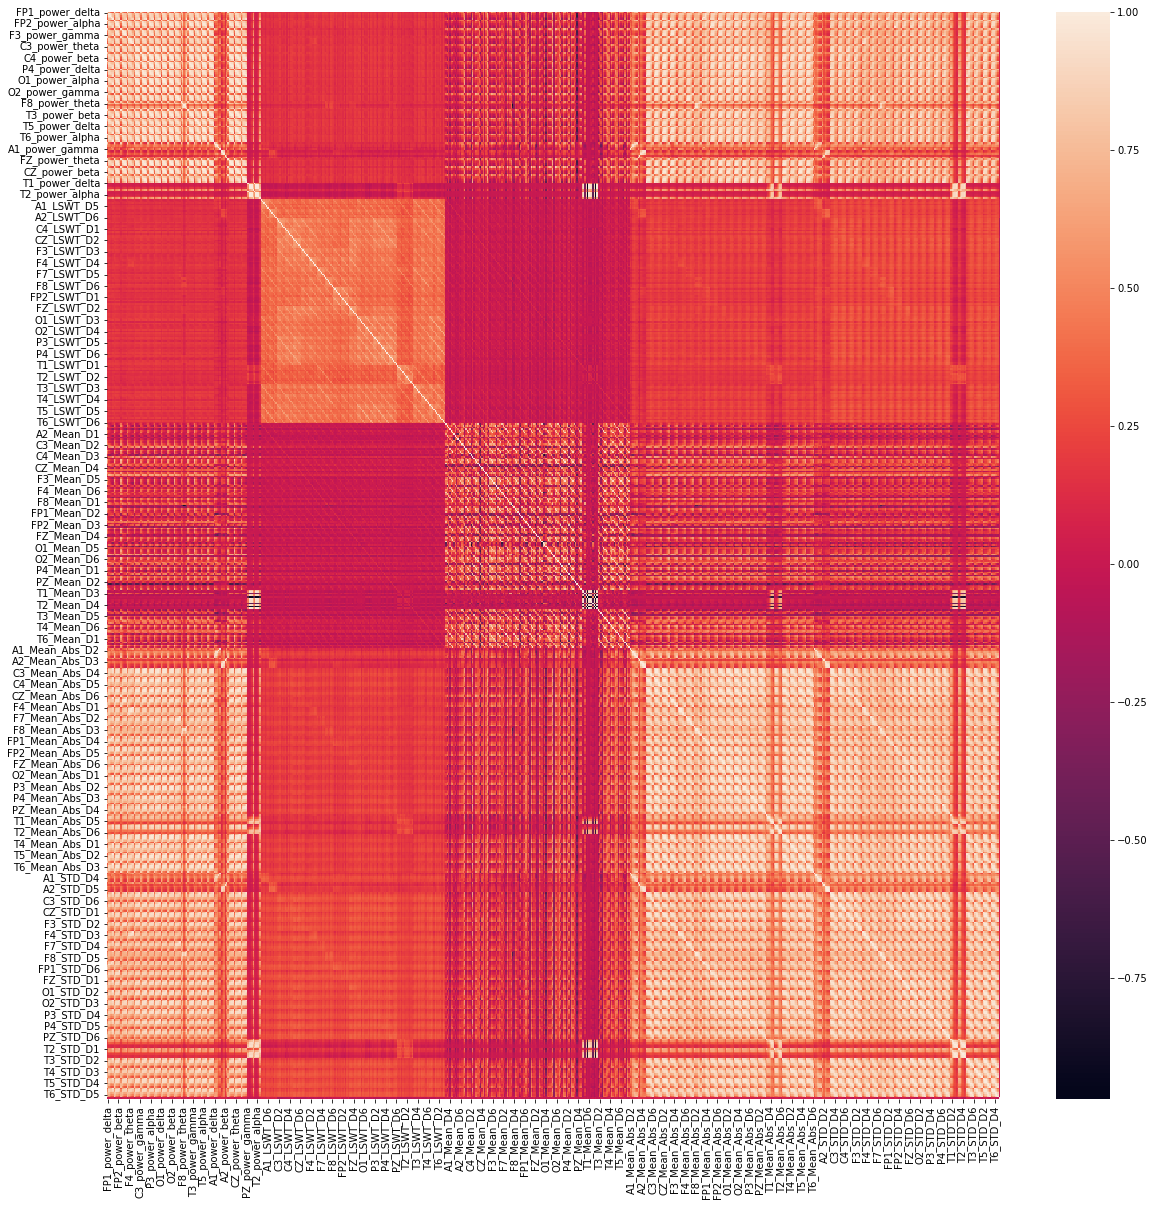

In [8]:
import seaborn as sns
plt.figure(figsize= (20, 20))
sns.heatmap(data.corr())

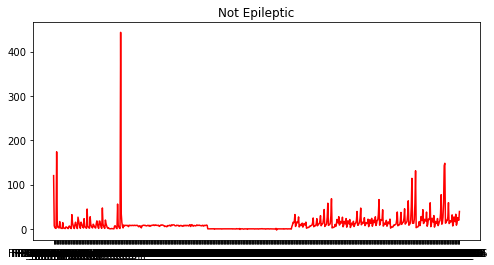

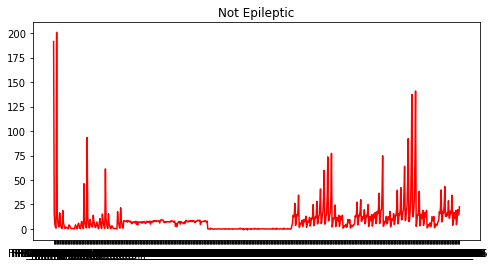

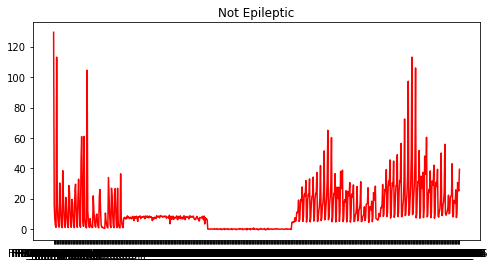

In [10]:
[(plt.figure(figsize=(8,4)), plt.title('Not Epileptic'), plt.plot(data[data['epileptic_'] == -1].iloc[i][0:-1],color='red')) 
 for i in range(3)];

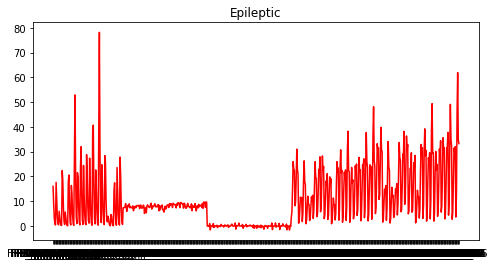

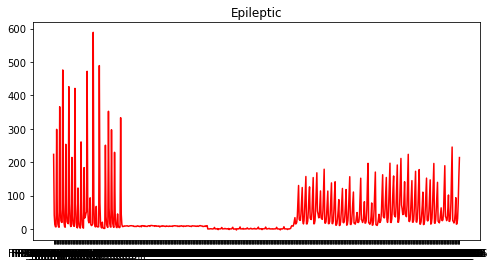

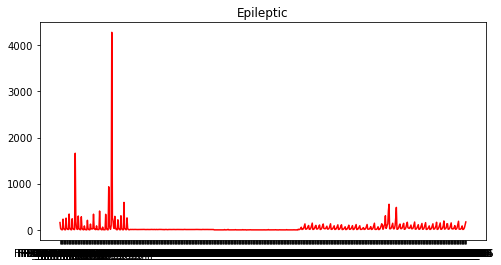

In [11]:
[(plt.figure(figsize=(8,4)), plt.title('Epileptic'), plt.plot(data[data['epileptic_'] == 1].iloc[i][0:-1],color='red'))
 for i in range(3)];

In [12]:
import imblearn
# define oversampling strategy
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(data.drop('epileptic_', axis=1), data['epileptic_'])

X.shape, y.shape

((2392, 667), (2392,))

In [13]:
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(y == True), len(y == False)))

Number of records of Non Epileptic 2392 VS Epilepttic 2392


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
normalized_df = pd.DataFrame(normalize(X))
normalized_df['epileptic_'] = y
X = normalized_df.drop('epileptic_', axis=1)
y = normalized_df['epileptic_']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

#Check the shapes after splitting
he = X_train, X_test, y_train, y_test

[arr.shape for arr in he]

[(1674, 667), (718, 667), (1674,), (718,)]

In [15]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_svc) + '%')

81.06%


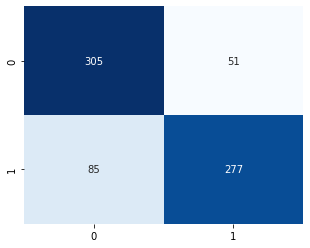

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_validate
import seaborn as sns

y_pred=clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(cm)
plt.figure(figsize=(5,4))
sns.heatmap(c_df, annot=True, fmt='d',cbar=False,cmap='Blues')
plt.show()

In [17]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_knn)+'%')

81.2%


In [18]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_knn)+'%')

85.24%


# Modelling

In [19]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model,ensemble,gaussian_process,svm,tree,naive_bayes
from mlxtend.classifier import EnsembleVoteClassifier,StackingClassifier


MLA = [
    LogisticRegression(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    SVC(probability=True),  
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
  
    

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #SVM

    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
  
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Hybrid
    StackingClassifier(classifiers=[GradientBoostingClassifier(),RandomForestClassifier()], meta_classifier=ensemble.ExtraTreesClassifier()),
    EnsembleVoteClassifier(clfs=[ensemble.ExtraTreesClassifier(),GradientBoostingClassifier(),RandomForestClassifier()], voting='soft'),
    
    ]


MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
12,ExtraTreesClassifier,0.9881,0.8621,0.874644,0.848066,0.862235
20,EnsembleVoteClassifier,0.9881,0.8496,0.848901,0.853591,0.849548
19,StackingClassifier,0.9881,0.8496,0.841398,0.864641,0.849455
11,BaggingClassifier,0.9791,0.8426,0.841096,0.848066,0.842572
2,RandomForestClassifier,0.9881,0.8412,0.833333,0.856354,0.841098
1,GradientBoostingClassifier,0.9528,0.8287,0.823848,0.839779,0.828597
5,KNeighborsClassifier,0.8793,0.8120,0.827089,0.792818,0.812139
3,SVC,0.8674,0.8106,0.844512,0.765193,0.810967
7,RidgeClassifierCV,0.8710,0.8106,0.810440,0.814917,0.810548
10,AdaBoostClassifier,0.8937,0.8036,0.799458,0.814917,0.803526


# Hypertuning of RandomForestClassifier

In [22]:
from sklearn.model_selection import GridSearchCV
model=ensemble.RandomForestClassifier()
parameters = {'n_estimators':[1, 10,100,1000],'criterion':['gini','entropy']}
clf = GridSearchCV(model, parameters,cv=5)
clf.fit(X_train, y_train)
scores=pd.DataFrame(clf.cv_results_)
scores


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054502,0.031764,0.007776,0.007214,gini,1,"{'criterion': 'gini', 'n_estimators': 1}",0.734328,0.791045,0.743284,0.707463,0.700599,0.735344,0.032097,8
1,0.378912,0.041467,0.015503,0.007919,gini,10,"{'criterion': 'gini', 'n_estimators': 10}",0.814925,0.853731,0.859701,0.844776,0.805389,0.835705,0.021605,5
2,3.371554,0.638916,0.034996,0.008369,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.841791,0.853731,0.889552,0.868657,0.811377,0.853022,0.026229,2
3,32.102012,1.510400,0.254457,0.054899,gini,1000,"{'criterion': 'gini', 'n_estimators': 1000}",0.844776,0.856716,0.877612,0.856716,0.820359,0.851236,0.018713,3
4,0.044625,0.018533,0.010626,0.006810,entropy,1,"{'criterion': 'entropy', 'n_estimators': 1}",0.734328,0.725373,0.746269,0.800000,0.739521,0.749098,0.026351,7
5,0.519826,0.077567,0.014717,0.009494,entropy,10,"{'criterion': 'entropy', 'n_estimators': 10}",0.829851,0.832836,0.859701,0.823881,0.811377,0.831529,0.015892,6
6,4.103252,0.441211,0.038491,0.012360,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",0.832836,0.853731,0.880597,0.850746,0.817365,0.847055,0.021293,4
7,42.669027,2.391408,0.243133,0.077581,entropy,1000,"{'criterion': 'entropy', 'n_estimators': 1000}",0.847761,0.868657,0.880597,0.862687,0.826347,0.857210,0.018707,1


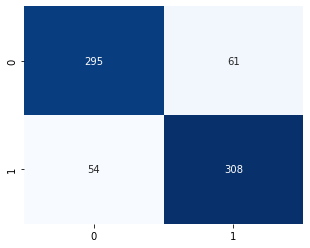

In [23]:
clf = ensemble.RandomForestClassifier(n_estimators=100,criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(cm)
plt.figure(figsize=(5,4))
sns.heatmap(c_df, annot=True, fmt='d',cbar=False,cmap='Blues')
plt.show()

  # Applying Neural Networks 

In [24]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [25]:

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation,MaxPool2D,MaxPool1D
from tensorflow.keras.layers import Conv1D,Conv2D,MaxPooling2D,MaxPooling1D
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1674, 667), (718, 667), (1674,), (718,))

In [27]:
data.iloc[:,:668]

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
0,15.980332,8.633358,3.092433,0.846559,0.372832,17.581626,9.937238,3.485713,0.945396,0.428797,...,31.427918,29.699413,32.013546,3.583559,12.529528,45.831132,61.890813,34.783454,33.245906,1
1,223.267803,41.573241,13.043525,6.463381,6.168712,298.274432,50.013025,14.411482,6.659230,4.942250,...,24.822720,47.185918,93.619195,14.158489,15.217886,30.927407,77.324322,153.442359,213.780950,1
2,158.673907,31.788608,9.956198,3.736977,2.926979,232.762742,39.332981,10.956081,3.478036,2.153082,...,21.708222,47.412375,85.729645,9.493639,11.824569,24.555772,59.229187,112.406306,171.618208,1
3,29.767326,3.875543,1.553127,0.438266,0.140495,45.206547,5.173542,2.028637,0.528962,0.161283,...,26.319506,39.628894,51.473202,1.872515,5.392639,17.296780,35.824586,44.892899,79.613460,1
4,33.821075,3.635210,1.347280,0.313205,0.080396,55.670043,4.925017,1.783729,0.394463,0.102254,...,26.111048,39.177537,52.925676,1.408291,4.556997,12.733549,25.676801,44.406617,94.770581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,93.573012,9.060520,4.980545,4.839014,2.402408,103.479883,10.121498,5.411378,5.112091,2.410508,...,28.420439,35.838353,55.575530,13.980452,15.455901,17.599760,35.736742,44.639277,52.441626,-1
2212,15.523587,3.195279,1.268068,0.788076,0.350012,15.177286,3.420879,1.324339,0.772379,0.340149,...,25.567858,29.982968,19.842641,3.896454,4.507998,9.674004,29.642064,32.178907,23.513508,-1
2213,17.580684,2.208482,0.512273,0.122671,0.042173,18.294247,2.380609,0.560150,0.132999,0.045041,...,15.186601,23.281200,31.479138,1.183803,2.253192,6.133507,18.810084,29.451244,40.868567,-1
2214,35.847315,3.354388,2.280252,2.368355,1.217081,33.889844,3.048972,1.356364,1.159790,0.632721,...,20.376012,23.182715,24.117538,6.995231,6.819144,9.820588,26.620415,30.167641,31.778504,-1


In [28]:
from sklearn.preprocessing import LabelBinarizer
X=np.asarray(data.values)
X=np.asarray(X[:,1:-1])
X=X.astype(float)
minm=X.min()
maxm=X.max()
X_norm=(X-minm)/(maxm-minm)
print(X.shape)
from sklearn.model_selection import train_test_split

mlb = LabelBinarizer()
y=np.asarray(data['epileptic_'])
# y=np.array.astype('float')
# Y=mlb.fit_transform(y)
Y=y.astype(float)

(2216, 666)


In [29]:
X=X.reshape(2216,666,1)
print(X.shape)

(2216, 666, 1)


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

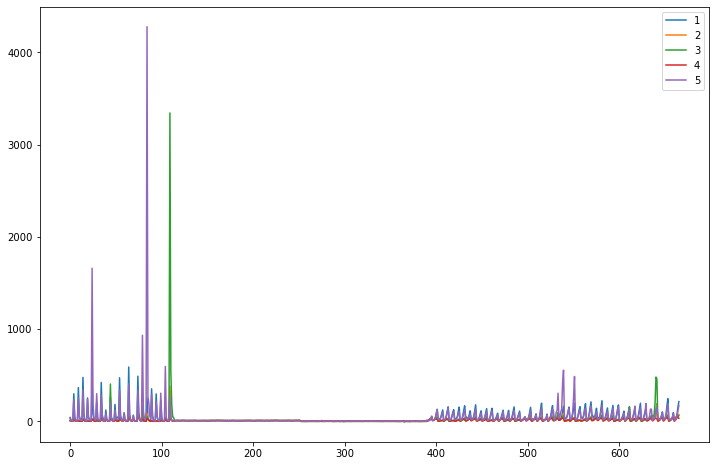

In [31]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

In [32]:
X = data.iloc[:,:667].values
X.shape
y=data.iloc[:,667].values
X.shape, y.shape

((2216, 667), (2216,))

In [33]:
y[y<1]=0
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x = scaler.transform(X)
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
x_train = np.reshape(x_train, (x_train.shape[0],1,X.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,X.shape[1]))

## LSTM MODELLING

In [37]:
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(64, input_shape=(1,667),activation="sigmoid",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.5))
#model.add(LSTM(100,return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(50))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
from tensorflow.keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             187392    
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 199,874
Trainable params: 199,874
Non-trainable params: 0
_________________________________________________________________


In [38]:

history = model.fit(x_train,y_train,epochs = 10, validation_data= (x_test,y_test))
score, acc = model.evaluate(x_test, y_test)

Epoch 1/10
56/56 [==============================] - 10s 34ms/step - loss: 0.7086 - accuracy: 0.5384 - val_loss: 0.6498 - val_accuracy: 0.6689
Epoch 2/10
56/56 [==============================] - 1s 10ms/step - loss: 0.6591 - accuracy: 0.5920 - val_loss: 0.6061 - val_accuracy: 0.7703
Epoch 3/10
56/56 [==============================] - 1s 12ms/step - loss: 0.6186 - accuracy: 0.6710 - val_loss: 0.5589 - val_accuracy: 0.7883
Epoch 4/10
56/56 [==============================] - 1s 15ms/step - loss: 0.5902 - accuracy: 0.6930 - val_loss: 0.5315 - val_accuracy: 0.7613
Epoch 5/10
56/56 [==============================] - 1s 15ms/step - loss: 0.5585 - accuracy: 0.7308 - val_loss: 0.4993 - val_accuracy: 0.7905
Epoch 6/10
56/56 [==============================] - 1s 12ms/step - loss: 0.5412 - accuracy: 0.7432 - val_loss: 0.4772 - val_accuracy: 0.8063
Epoch 7/10
56/56 [==============================] - 0s 8ms/step - loss: 0.5124 - accuracy: 0.7562 - val_loss: 0.4655 - val_accuracy: 0.7950
Epoch 8/10
56

In [40]:
print(acc,"is the accuracy for lstm model")

0.7972972989082336 is the accuracy for lstm model


## Thank You